In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset//Train_HR_Employee_Attrition.csv")
#df.info()

In [3]:
numerical_categorical = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'StockOptionLevel',
                         'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel']

num_attr= [col for col in df._get_numeric_data() if col not in numerical_categorical]

cat_attr = [col for col in df.columns if col not in num_attr]

In [11]:
#Stats for all numerical attributes 
for attr in num_attr:
    print(f"{attr}\n{df[attr].describe()}\n\n")

Age
count    1000.000000
mean       37.199000
std         9.015802
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


DailyRate
count    1176.000000
mean      803.650510
std       406.683045
min       102.000000
25%       460.500000
50%       804.000000
75%      1169.000000
max      1499.000000
Name: DailyRate, dtype: float64


DistanceFromHome
count    1176.000000
mean        9.210034
std         8.097024
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64


Education
count    1176.000000
mean        2.884354
std         1.016574
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64


EnvironmentSatisfaction
count    1176.000000
mean        2.715986
std         1.088876
min         1.000000
25%         2.000000
50%         3.000000


In [25]:
#Stats for all categorical attributes 
for attr in cat_attr:
    print(f"**{attr}\n{df[attr].astype('object').describe()}")
    print(f"\n{attr} Classes")
    print(df[attr].astype('object').value_counts(normalize=True))
    print(df[attr].astype('object').value_counts(normalize=False))
    print(f"\n\n")

**Attrition
count     1176
unique       2
top         No
freq       984
Name: Attrition, dtype: object

Attrition Classes
No     0.836735
Yes    0.163265
Name: Attrition, dtype: float64
No     984
Yes    192
Name: Attrition, dtype: int64



**BusinessTravel
count              1069
unique                3
top       Travel_Rarely
freq                764
Name: BusinessTravel, dtype: object

BusinessTravel Classes
Travel_Rarely        0.714687
Travel_Frequently    0.179607
Non-Travel           0.105706
Name: BusinessTravel, dtype: float64
Travel_Rarely        764
Travel_Frequently    192
Non-Travel           113
Name: BusinessTravel, dtype: int64



**Department
count                       1176
unique                         3
top       Research & Development
freq                         769
Name: Department, dtype: object

Department Classes
Research & Development    0.653912
Sales                     0.306973
Human Resources           0.039116
Name: Department, dtype: float64
Research & 

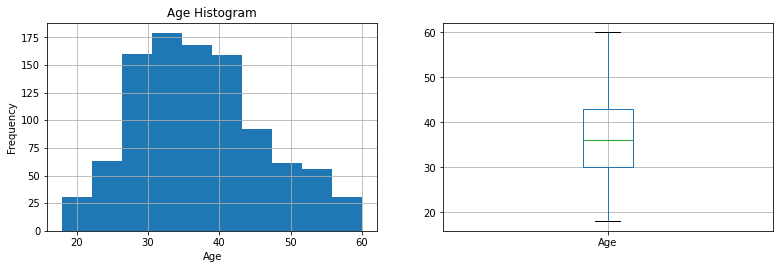

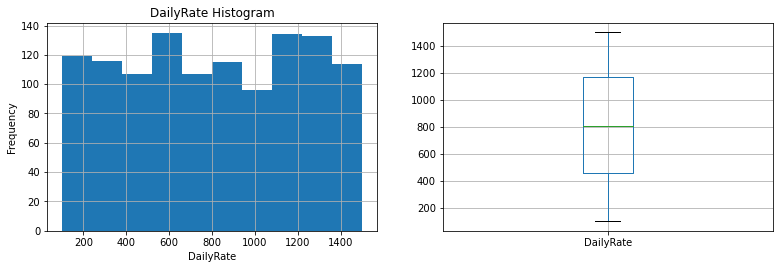

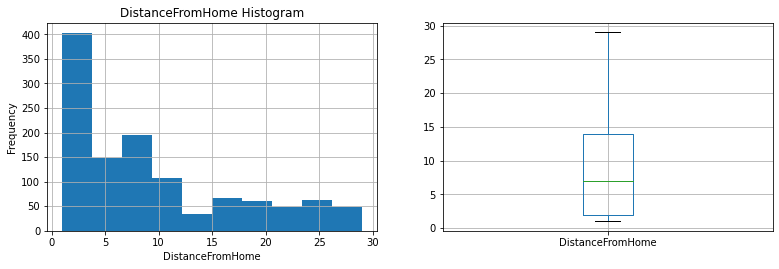

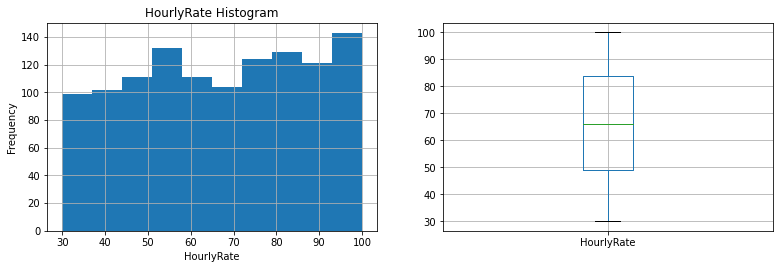

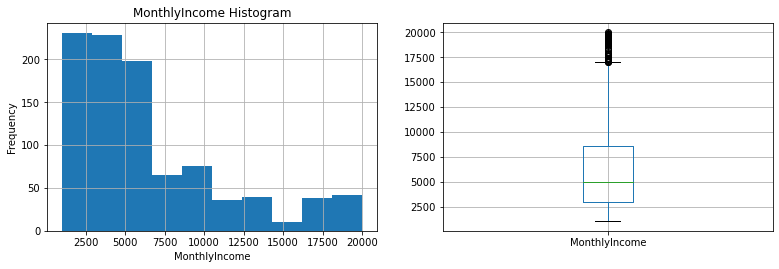

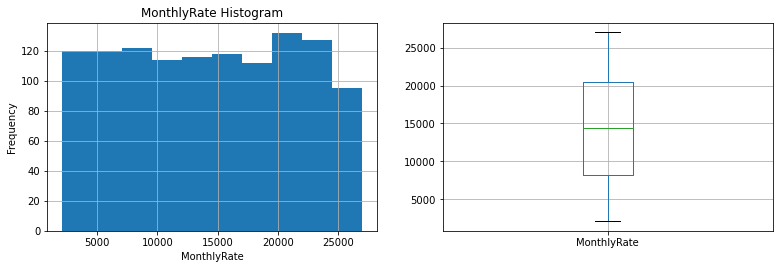

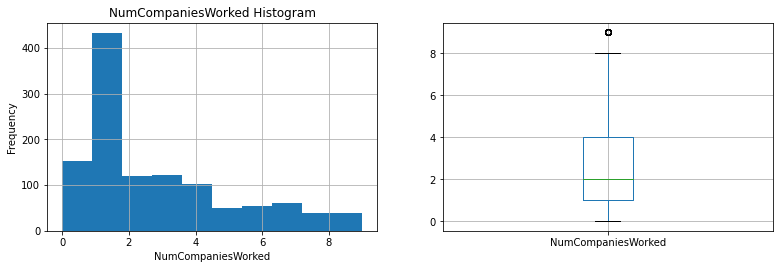

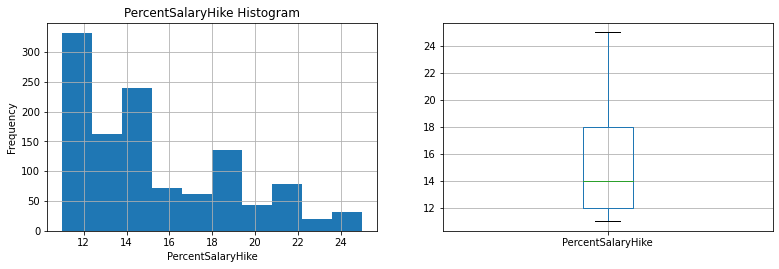

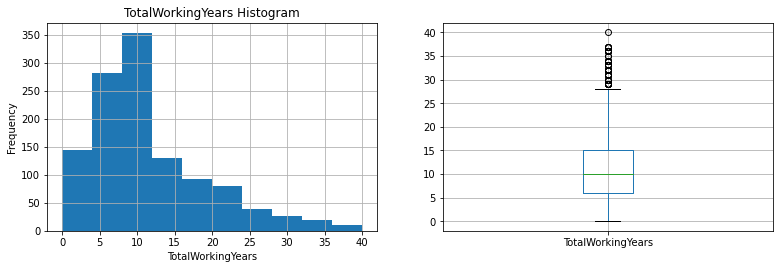

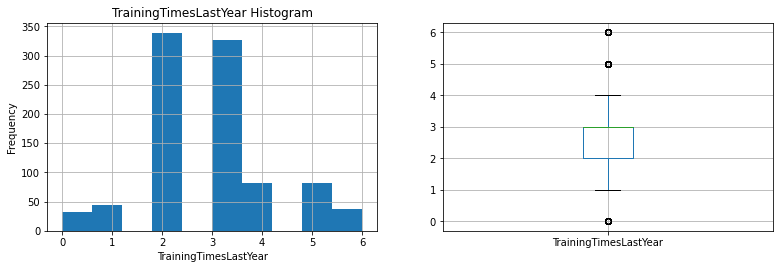

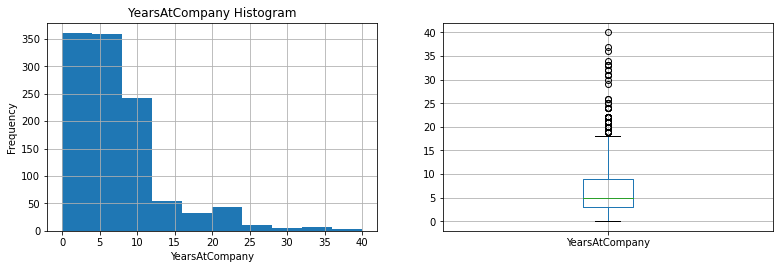

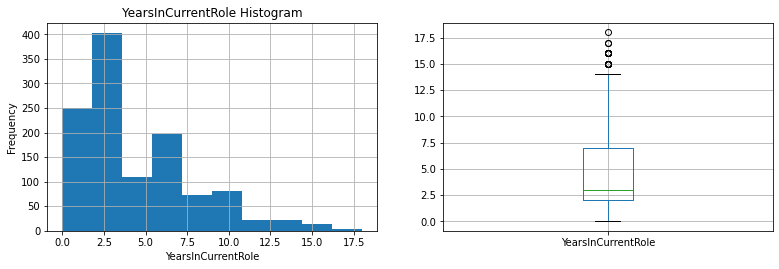

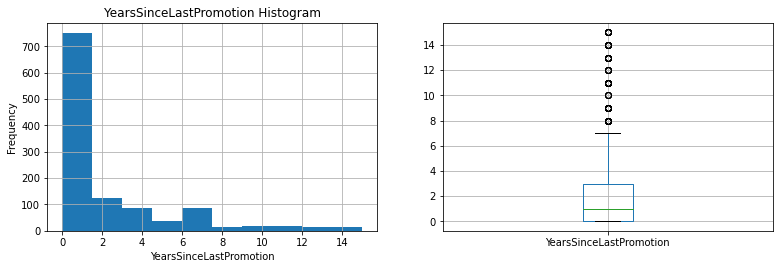

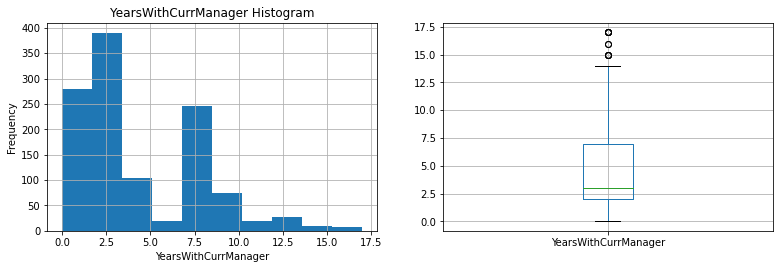

In [96]:
#NUMERIC ATTRIBUTE HISTOGRAMS AND BOXPLOT (DISCRETE OVER 6 CLASSES) 
#fast view - default bin width default

for attr in num_attr:            
    fig = plt.figure(figsize=(13, 13)) 
    fig_dims = (3, 2)
    
    #Histogram
    plt.subplot2grid(fig_dims, (0, 0))
    df[attr].hist()
    plt.title(attr + " Histogram")
    plt.xlabel(attr)
    plt.ylabel('Frequency')

    #Boxplot
    plt.subplot2grid(fig_dims, (0, 1))
    df.boxplot(column=[attr])

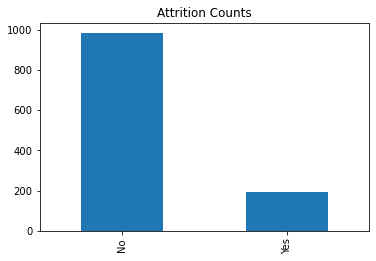

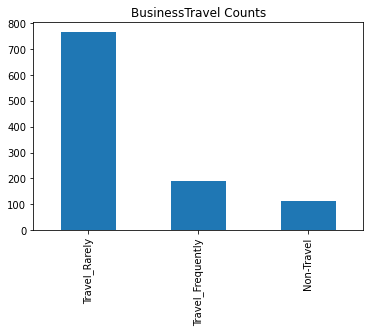

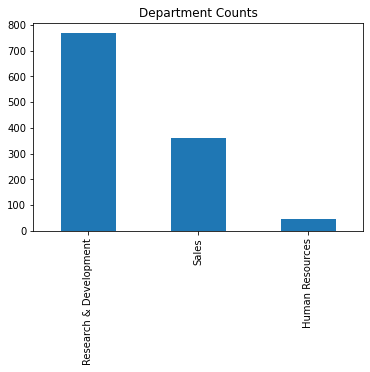

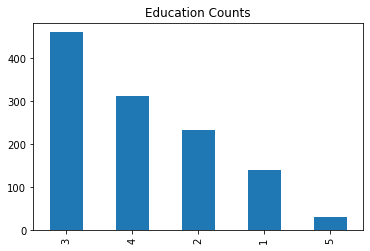

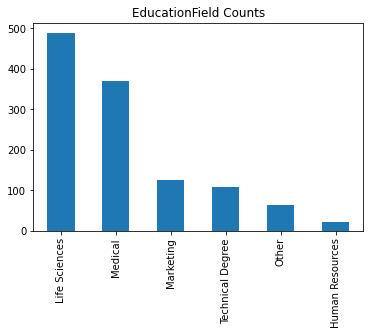

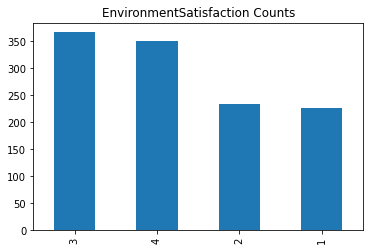

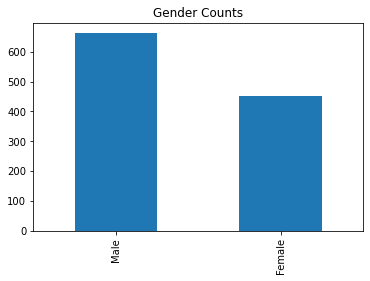

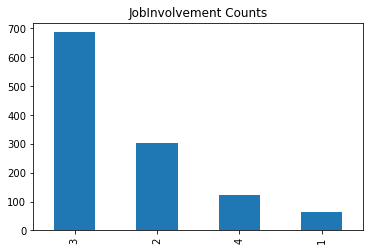

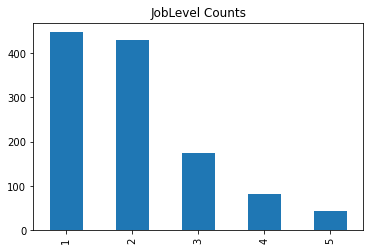

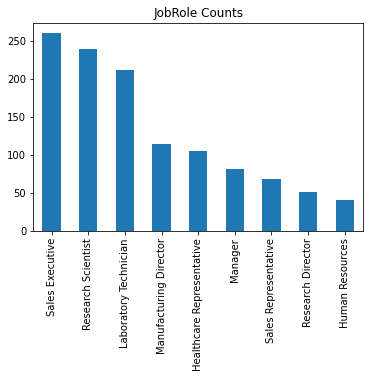

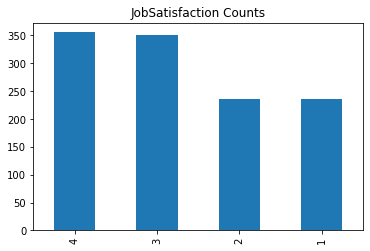

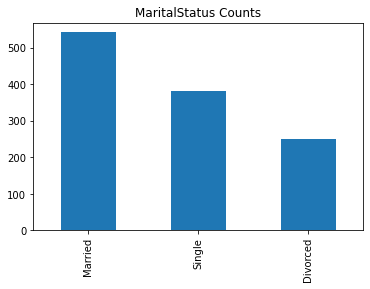

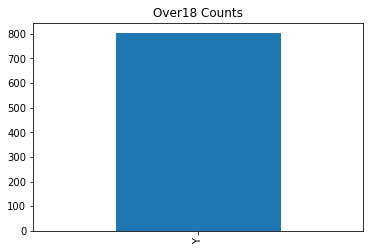

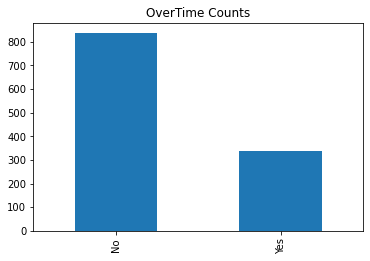

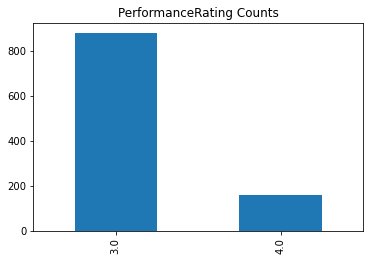

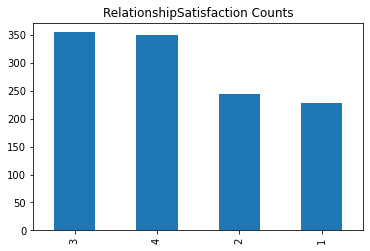

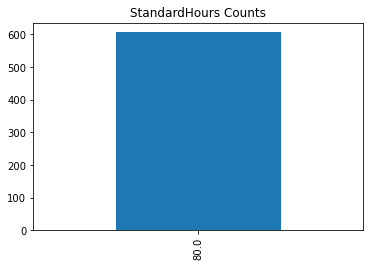

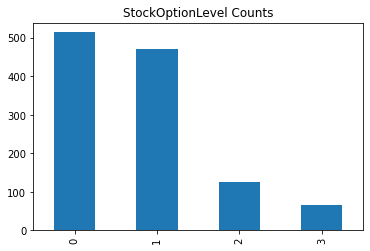

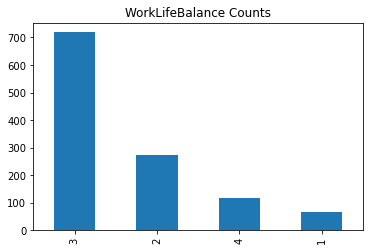

In [97]:
#NOMINAL ATTRIBUTE BAR CHARTS
# fast view: without xlabel

for attr in cat_attr:            
    fig = plt.figure(figsize=(13, 13)) 
    fig_dims = (3, 2)
    
    #Bar Charts
    plt.subplot2grid(fig_dims, (0, 0))
    df[attr].value_counts().plot(kind='bar',title=attr+" Counts")


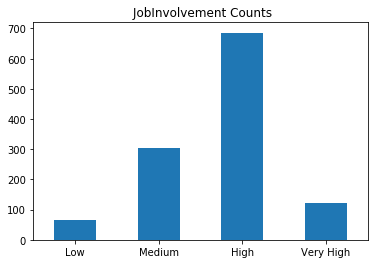

In [9]:
#Bar chart JobInvolvement translating numerical values into their meanings 
perf_dict = {1:"Low", 2:"Medium", 3:"High", 4:"Very High"}
tmp=df["JobInvolvement"].value_counts(sort=False).rename(index=perf_dict)
tmp.plot(kind='bar',title=" JobInvolvement Counts",rot=0)

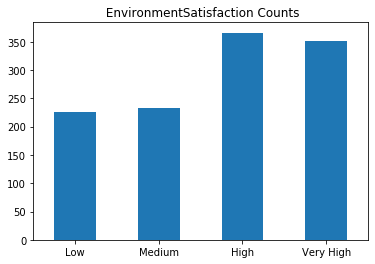

In [5]:
#Bar chart EnvironmentSatisfaction translating numerical values into their meanings 
tmp=df["EnvironmentSatisfaction"].value_counts(sort=False).rename(index=perf_dict)
tmp.plot(kind='bar',title=" EnvironmentSatisfaction Counts",rot=0)

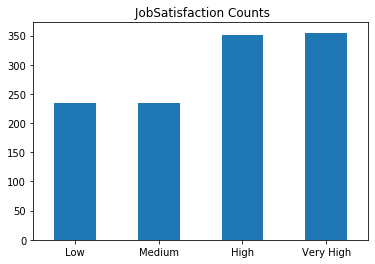

In [6]:
#Bar chart JobSatisfaction translating numerical values into their meanings 
tmp=df["JobSatisfaction"].value_counts(sort=False).rename(index=perf_dict)
tmp.plot(kind='bar',title=" JobSatisfaction Counts",rot=0)

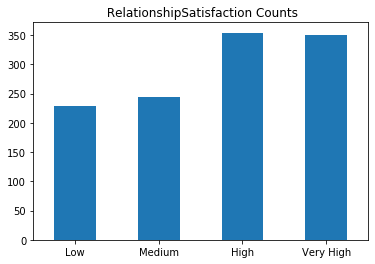

In [10]:
#Bar chart RelationshipSatisfaction translating numerical values into their meanings 
tmp=df["RelationshipSatisfaction"].value_counts(sort=False).rename(index=perf_dict)
tmp.plot(kind='bar',title=" RelationshipSatisfaction Counts",rot=0)

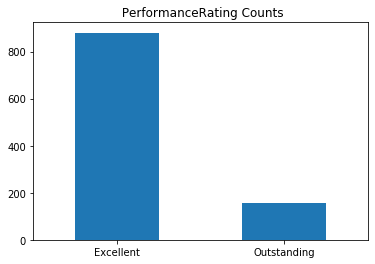

In [7]:
#Bar chart PerformanceRating translating numerical values into their meanings 
perf_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
tmp=df["PerformanceRating"].value_counts(sort=False).rename(index=perf_dict)
tmp.plot(kind='bar',title=" PerformanceRating Counts",rot=0)

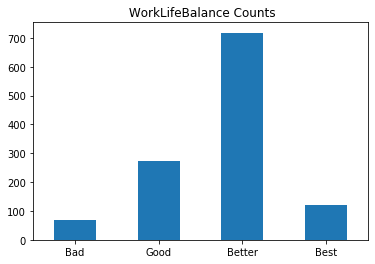

In [12]:
#Bar chart WorkLifeBalance translating numerical values into their meanings 
worklife_dict = {1: 'Bad', 2: 'Good', 3:'Better', 4: 'Best'}
tmp=df["WorkLifeBalance"].value_counts(sort=False).rename(index=worklife_dict)
tmp.plot(kind='bar',title=" WorkLifeBalance Counts",rot=0)

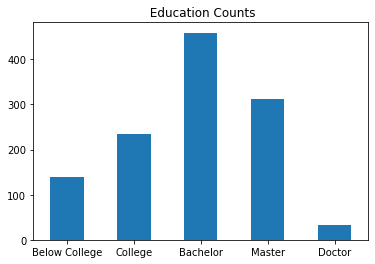

In [104]:
#Bar chart Education translating numerical values into their meanings 
edu_dict = {3:'Bachelor',4:'Master',2:'College',1:'Below College',5:'Doctor'}
tmp=df["Education"].alue_counts(sort=False).rename(index=edu_dict)
tmp.plot(kind='bar',title=" Education Counts",rot=0)

Text(0, 0.5, 'Attrition')

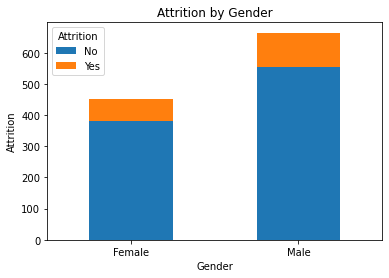

In [105]:
#BAR CHART OF GENDER BY ATTRITION
xt = pd.crosstab(df['Gender'],df['Attrition'])
xt.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition')

Text(0, 0.5, 'Attrition')

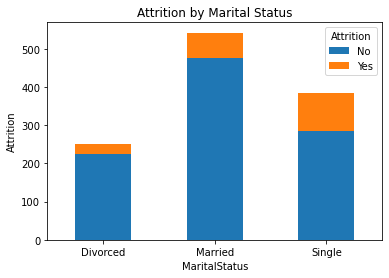

In [106]:
#Cross Bar MaritalStatus-Attrition
xt = pd.crosstab(df['MaritalStatus'],df['Attrition'])
xt.plot(kind='bar', stacked=True,rot=0)
plt.title('Attrition by Marital Status')
plt.xlabel('MaritalStatus')
plt.ylabel('Attrition')

Text(0, 0.5, 'Attrition')

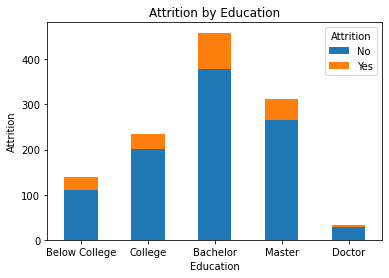

In [107]:
#Cross Bar Education-Attrition
xt = pd.crosstab(df['Education'],df['Attrition'])
xt=xt.rename({3:'Bachelor',4:'Master',2:'College',1:'Below College',5:'Doctor'})
xt.plot(kind='bar', stacked=True, rot=0)

plt.title('Attrition by Education')
plt.xlabel('Education')
plt.ylabel('Attrition')

Text(0, 0.5, 'Attrition')

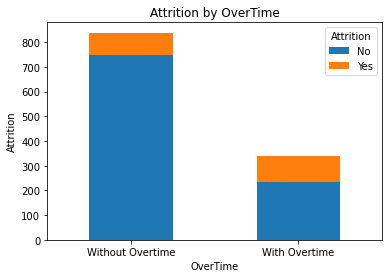

In [108]:
#Cross Bar OverTime-Attrition
xt = pd.crosstab(df['OverTime'],df['Attrition'])
xt=xt.rename({'No':'Without Overtime','Yes':'With Overtime'})
xt.plot(kind='bar', stacked=True, rot=0)

plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Attrition')

Text(0, 0.5, 'Count')

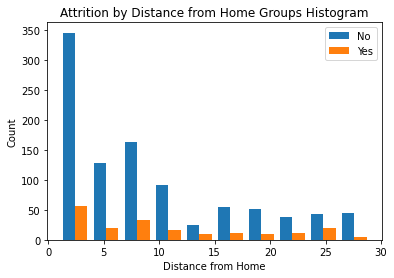

In [109]:
#Cross Hist DistanceFromHome-Attrition
df1=df[df['Attrition'] == 'No']['DistanceFromHome']
df2=df[df['Attrition'] == 'Yes']['DistanceFromHome']
plt.hist([df1, df2],stacked=False)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Attrition by Distance from Home Groups Histogram')
plt.xlabel('Distance from Home')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

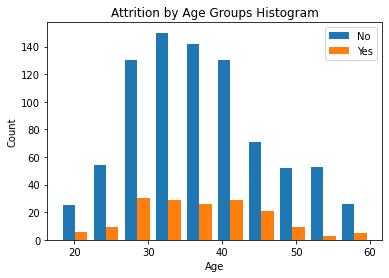

In [110]:
#Cross Hist Agesky-Attrition
df1=df[df['Attrition'] == 'No']['Age']
df2=df[df['Attrition'] == 'Yes']['Age']
plt.hist([df1, df2],stacked=False)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Attrition by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

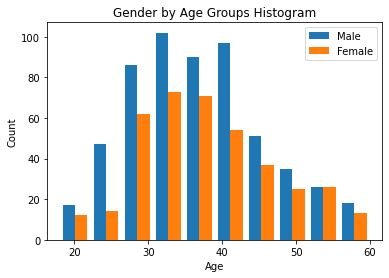

In [111]:
#Cross Hist Age-Gender
df1=df[df['Gender'] == 'Male']['Age']
df2=df[df['Gender'] == 'Female']['Age']
plt.hist([df1, df2],stacked=False)
plt.legend(('Male', 'Female'), loc='best')
plt.title('Gender by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

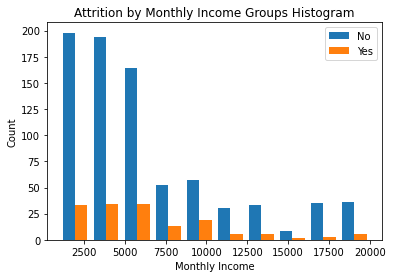

In [112]:
#Cross Hist MonthlyIncome-Attrition
df1=df[df['Attrition'] == 'No']['MonthlyIncome']
df2=df[df['Attrition'] == 'Yes']['MonthlyIncome']
max_income=max(df['MonthlyIncome'])
plt.hist([df1, df2],stacked=False)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Attrition by Monthly Income Groups Histogram')
plt.xlabel('Monthly Income')
plt.ylabel('Count')


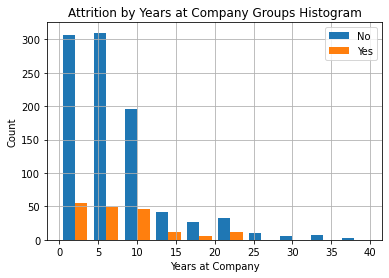

In [113]:
#Cross Hist YearsAtCompany-Attrition
df1=df[df['Attrition'] == 'No']['YearsAtCompany']
df2=df[df['Attrition'] == 'Yes']['YearsAtCompany']
max_income=max(df['YearsAtCompany'])
plt.hist([df1, df2],stacked=False)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Attrition by Years at Company Groups Histogram')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.grid(True)

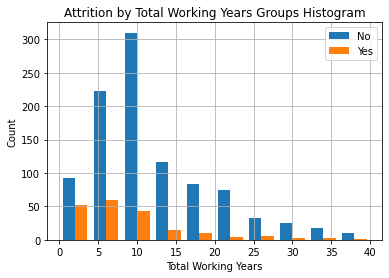

In [114]:
#Cross Hist TotalWorkingYears-Attrition
df1=df[df['Attrition'] == 'No']['TotalWorkingYears']
df2=df[df['Attrition'] == 'Yes']['TotalWorkingYears']
max_income=max(df['TotalWorkingYears'])
plt.hist([df1, df2],stacked=False)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Attrition by Total Working Years Groups Histogram')
plt.xlabel('Total Working Years')
plt.ylabel('Count')
plt.grid(True)

Text(0, 0.5, 'Attrition')

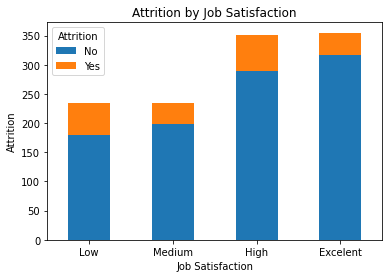

In [115]:
#CROSSTAB WITH ATTRITION
xt = pd.crosstab(df['JobSatisfaction'],df['Attrition'])
xt=xt.rename({3:'High',4:'Excelent',2:'Medium',1:'Low'})
xt.plot(kind='bar', stacked=True,rot=0)
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition')

Text(0, 0.5, 'Attrition')

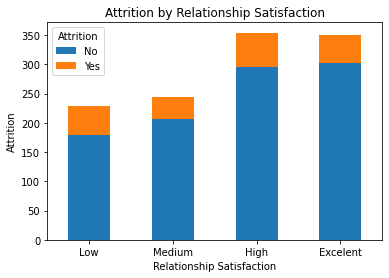

In [116]:
xt = pd.crosstab(df['RelationshipSatisfaction'],df['Attrition'])
xt=xt.rename({3:'High',4:'Excelent',2:'Medium',1:'Low'})
xt.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Relationship Satisfaction')
plt.xlabel('Relationship Satisfaction')
plt.ylabel('Attrition')

Text(0, 0.5, 'Attrition')

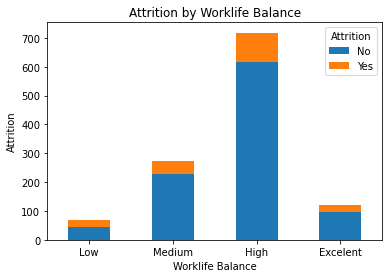

In [117]:
xt = pd.crosstab(df['WorkLifeBalance'],df['Attrition'])
xt=xt.rename({3:'High',4:'Excelent',2:'Medium',1:'Low'})
xt.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Worklife Balance')
plt.xlabel('Worklife Balance')
plt.ylabel('Attrition')

Text(0, 0.5, 'Attrition')

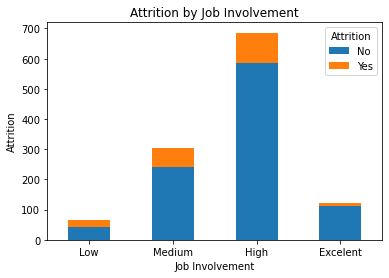

In [118]:
xt = pd.crosstab(df['JobInvolvement'],df['Attrition'])
xt=xt.rename({3:'High',4:'Excelent',2:'Medium',1:'Low'})
xt.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Job Involvement')
plt.xlabel('Job Involvement')
plt.ylabel('Attrition')

Text(0, 0.5, 'Attrition')

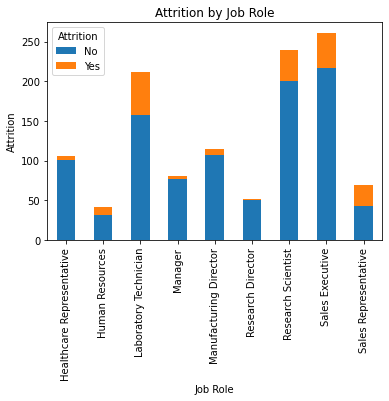

In [119]:
xt = pd.crosstab(df['JobRole'],df['Attrition'])
xt.plot(kind='bar', stacked=True)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition')

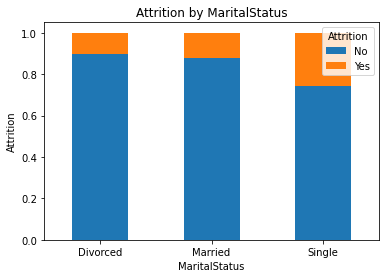

Attrition            No       Yes
MaritalStatus                    
Divorced       0.896414  0.103586
Married        0.876384  0.123616
Single         0.741514  0.258486


In [120]:
##########################
#ATTRITION PROBABILITY NORMALIZED

#Attrition by Divorced Male/Female 

attr='MaritalStatus'
pclass_xt = pd.crosstab(df[attr], df['Attrition'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Attrition by MaritalStatus",rot=0)
plt.xlabel('MaritalStatus')
plt.ylabel('Attrition')
plt.show()

print(pclass_xt_pct)

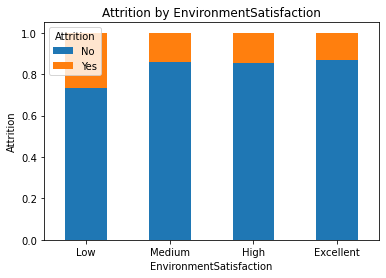

Attrition                      No       Yes
EnvironmentSatisfaction                    
Low                      0.734513  0.265487
Medium                   0.858369  0.141631
High                     0.855191  0.144809
Excellent                0.868946  0.131054


In [121]:
attr='EnvironmentSatisfaction'
pclass_xt = pd.crosstab(df[attr], df['Attrition'])
pclass_xt=pclass_xt.rename({3:'High',4:'Excellent',2:'Medium',1:'Low'})
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Attrition by "+attr,rot=0)
plt.xlabel(attr)
plt.ylabel('Attrition')
plt.show()

print(pclass_xt_pct)

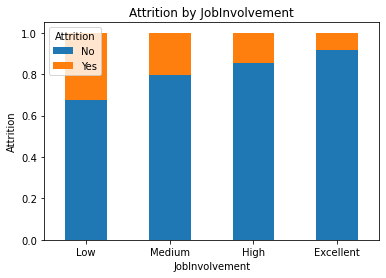

Attrition             No       Yes
JobInvolvement                    
Low             0.676923  0.323077
Medium          0.795380  0.204620
High            0.855685  0.144315
Excellent       0.918033  0.081967


In [122]:
attr='JobInvolvement'
pclass_xt = pd.crosstab(df[attr], df['Attrition'])
pclass_xt=pclass_xt.rename({3:'High',4:'Excellent',2:'Medium',1:'Low'})
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Attrition by "+attr,rot=0)
plt.xlabel(attr)
plt.ylabel('Attrition')
plt.show()

print(pclass_xt_pct)

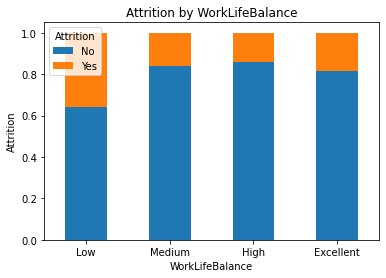

Attrition              No       Yes
WorkLifeBalance                    
Low              0.641791  0.358209
Medium           0.838235  0.161765
High             0.857939  0.142061
Excellent        0.815126  0.184874


In [123]:
attr='WorkLifeBalance'
pclass_xt = pd.crosstab(df[attr], df['Attrition'])
pclass_xt=pclass_xt.rename({3:'High',4:'Excellent',2:'Medium',1:'Low'})
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Attrition by "+attr,rot=0)
plt.xlabel(attr)
plt.ylabel('Attrition')
plt.show()

print(pclass_xt_pct)


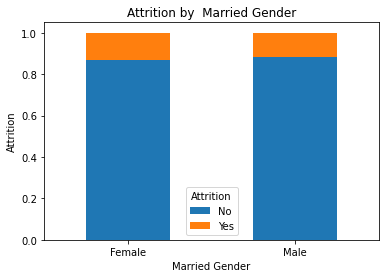

Attrition        No       Yes
Gender                       
Female     0.869369  0.130631
Male       0.885135  0.114865


In [124]:
#Attrition by Married Male/Female 

attr='Gender'
pclass_xt = pd.crosstab(df[df['MaritalStatus']=='Married'][attr], df['Attrition'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Attrition by  Married "+attr,rot=0)
plt.xlabel('Married Gender')
plt.ylabel('Attrition')
plt.show()

print(pclass_xt_pct)

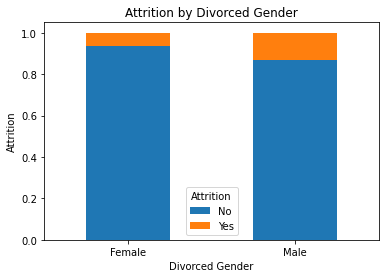

Attrition        No       Yes
Gender                       
Female     0.936170  0.063830
Male       0.867133  0.132867


In [125]:
#Attrition by Divorced Male/Female 

attr='Gender'
pclass_xt = pd.crosstab(df[df['MaritalStatus']=='Divorced'][attr], df['Attrition'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Attrition by Divorced "+attr,rot=0)
plt.xlabel('Divorced Gender')
plt.ylabel('Attrition')
plt.show()

print(pclass_xt_pct)

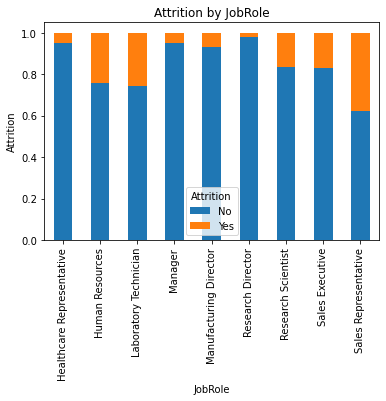

Attrition                        No       Yes
JobRole                                      
Healthcare Representative  0.952830  0.047170
Human Resources            0.756098  0.243902
Laboratory Technician      0.745283  0.254717
Manager                    0.950617  0.049383
Manufacturing Director     0.930435  0.069565
Research Director          0.980392  0.019608
Research Scientist         0.833333  0.166667
Sales Executive            0.831418  0.168582
Sales Representative       0.623188  0.376812


In [126]:
#Attrition by JobRole 

attr='JobRole'
pclass_xt = pd.crosstab(df[attr], df['Attrition'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Attrition by JobRole",rot=90)
plt.xlabel('JobRole')
plt.ylabel('Attrition')
plt.show()

print(pclass_xt_pct)

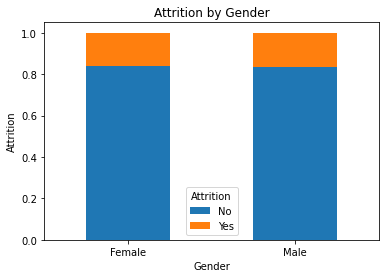

In [127]:
attr='Gender'

pclass_xt = pd.crosstab(df[attr], df['Attrition'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Attrition by "+attr,rot=0)
plt.xlabel(attr)
plt.ylabel('Attrition')
plt.show()

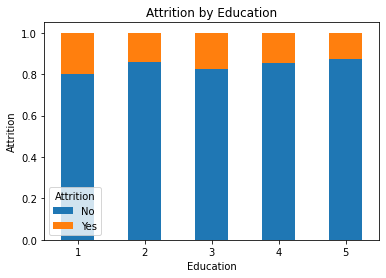

In [128]:
attr='Education'

pclass_xt = pd.crosstab(df[attr], df['Attrition'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Attrition by "+attr,rot=0)
plt.xlabel(attr)
plt.ylabel('Attrition')
plt.show()

<Figure size 1080x1440 with 0 Axes>

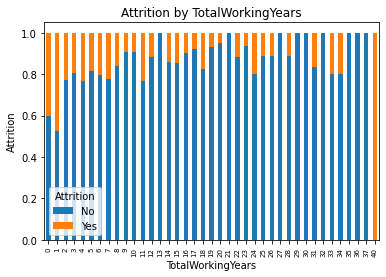

In [129]:
attr='TotalWorkingYears'

fig = plt.figure(figsize = (15,20))

pclass_xt = pd.crosstab(df[attr], df['Attrition'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True,title="Attrition by "+attr,rot=90)
plt.xticks(fontsize=7)
plt.xlabel(attr)
plt.ylabel('Attrition')
plt.show()



In [6]:
attrition_lab = sorted(df['Attrition'].unique())
for lab in attrition_lab:
    df[['TotalWorkingYears']==lab].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
plt.title('TotalWorkingYears by Attition')
plt.xlabel('TotalWorkingYears')
plt.legend(('Yes', 'No'), loc='best')
plt.show()

KeyError: False

Text(0, 0.5, 'Count')

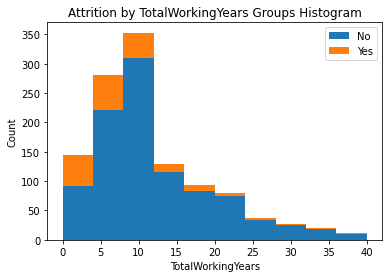

In [131]:
#Cross Hist TotalWorkingYears-Attrition
df1=df[df['Attrition'] == 'No']['TotalWorkingYears']
df2=df[df['Attrition'] == 'Yes']['TotalWorkingYears']
plt.hist([df1, df2],stacked=True)
plt.legend(('No', 'Yes'), loc='best')
plt.title('Attrition by TotalWorkingYears Groups Histogram')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Count')

In [338]:
################
#MISSING VALUES#
################
import pandas as pd
df = pd.read_csv("./data/Train_HR_Employee_Attrition.csv")

#infer Gender by Gender mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

#infer BusinessTravel by BusinessTravel mode
df['BusinessTravel']=df['BusinessTravel'].fillna(df['BusinessTravel'].mode()[0])

#infer PerformanceRating by PerformanceRating mode
df['PerformanceRating'] = df['PerformanceRating'].fillna(df['PerformanceRating'].mode()[0])

#infer YearsAtCompany by YearsAtCompany mean
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df['YearsAtCompany'].median())

#infer MonthlyIncome by mean grouped by YearsAtCompany-Quartiles
print(df['MonthlyIncome'].describe())
bins = pd.qcut(df['YearsAtCompany'],[0,0.25,0.50,0.75,1.0])
df['MonthlyIncome'] = df['MonthlyIncome'].groupby(bins).apply(
                      lambda x: x.fillna(x.mean()))
print(df['MonthlyIncome'].describe())

#infer Age by mean grouped by MonthlyIncome-quartiles
print(df['Age'].describe())
bins = pd.qcut(df['MonthlyIncome'],[0,0.25,0.50,0.75,1.0])
df['Age'] = df['Age'].groupby(bins).apply(lambda x: x.fillna(x.mean()))
print(df['Age'].describe())

#TrainingTimesLastYear by fillna with TrainingTimesLastYear values probability
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df['TrainingTimesLastYear'].mode()[0])

#cambiare la moda con probabilità e stampare istogrammi



##########################
#REDUCTION DIMENSIONALITY#
##########################
df.drop(["Over18", "StandardHours"], axis=1,inplace=True)


count      963.000000
mean      6565.946002
std       4710.625603
min       1009.000000
25%       2969.000000
50%       4969.000000
75%       8585.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64
count     1176.000000
mean      6517.097141
std       4320.726141
min       1009.000000
25%       3450.750000
50%       5238.000000
75%       7980.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64
count    1000.000000
mean       37.199000
std         9.015802
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64
count    1176.000000
mean       37.139082
std         8.430024
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


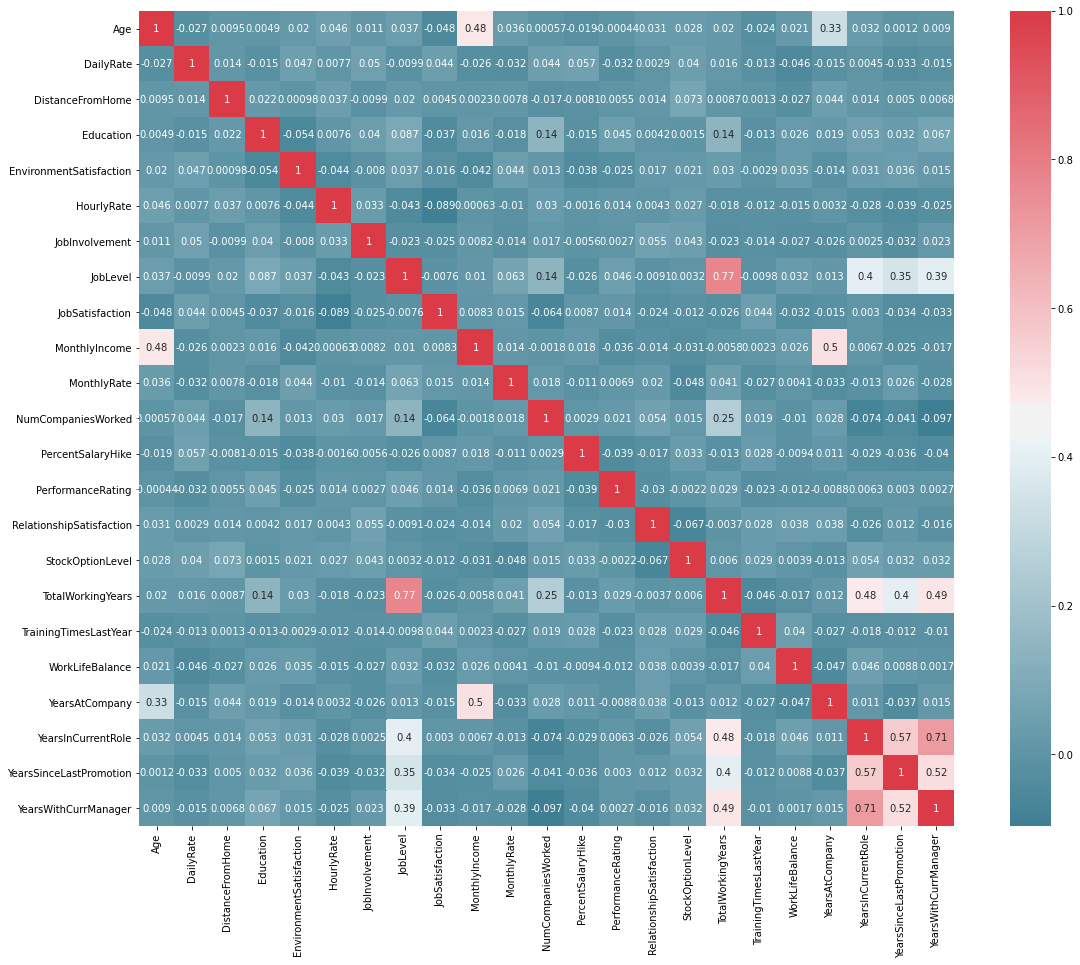

In [339]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

In [340]:
#OUTLIERS

def outinf(attr):
    q1= df[attr].quantile(0.25)
    q3= df[attr].quantile(0.75)
    iqr=q3-q1
    filt = (df[attr]< q1-1.5*iqr) | (df[attr]>q3+1.5*iqr)
    print(len(df[filt]))
    print(f"[{q1-1.5*iqr} , {q3+1.5*iqr}]")


#MonthlyIncome - var trasformation
attr = "MonthlyIncome"
df[attr] = np.log(df[attr])

#NumCompaniesWorked - 40 outliers pari a 9. settati a iqr+1.5
attr = "NumCompaniesWorked"
q1= df[attr].quantile(0.25)
q3= df[attr].quantile(0.75)
iqr=q3-q1
df.loc[df[attr]>q3+1.5*iqr,attr]=q3+1.5*iqr

#TotalWorkingYears - 49 outliers > 28.5 (max 40) le setto upper
attr = "TotalWorkingYears"
q1= df[attr].quantile(0.25)
q3= df[attr].quantile(0.75)
iqr=q3-q1
df.loc[df[attr]>q3+1.5*iqr,attr]=q3+1.5*iqr

#TrainingTimesLastYear - 
attr = "TrainingTimesLastYear"   
q1= df[attr].quantile(0.25)
q3= df[attr].quantile(0.75)
iqr=q3-q1
df.loc[df[attr]>q3+1.5*iqr,attr]=q3+1.5*iqr
df.loc[df[attr]<q1-1.5*iqr,attr]=q1-1.5*iqr


#YearsAtCompany - 
attr = "YearsAtCompany"  
q1= df[attr].quantile(0.25)
q3= df[attr].quantile(0.75)
iqr=q3-q1
df.loc[df[attr]>q3+1.5*iqr,attr]=q3+1.5*iqr

#YearsInCurrentRole - 
attr = "YearsInCurrentRole"
q1= df[attr].quantile(0.25)
q3= df[attr].quantile(0.75)
iqr=q3-q1
df.loc[df[attr]>q3+1.5*iqr,attr]=q3+1.5*iqr

#YearsSinceLastPromotion - 
attr = "YearsSinceLastPromotion"
q1= df[attr].quantile(0.25)
q3= df[attr].quantile(0.75)
iqr=q3-q1
df.loc[df[attr]>q3+1.5*iqr,attr]=q3+1.5*iqr

#YearsWithCurrManager - 
attr = "YearsWithCurrManager"
q1= df[attr].quantile(0.25)
q3= df[attr].quantile(0.75)
iqr=q3-q1
df.loc[df[attr]>q3+1.5*iqr,attr]=q3+1.5*iqr


11
[-5.5 , 14.5]


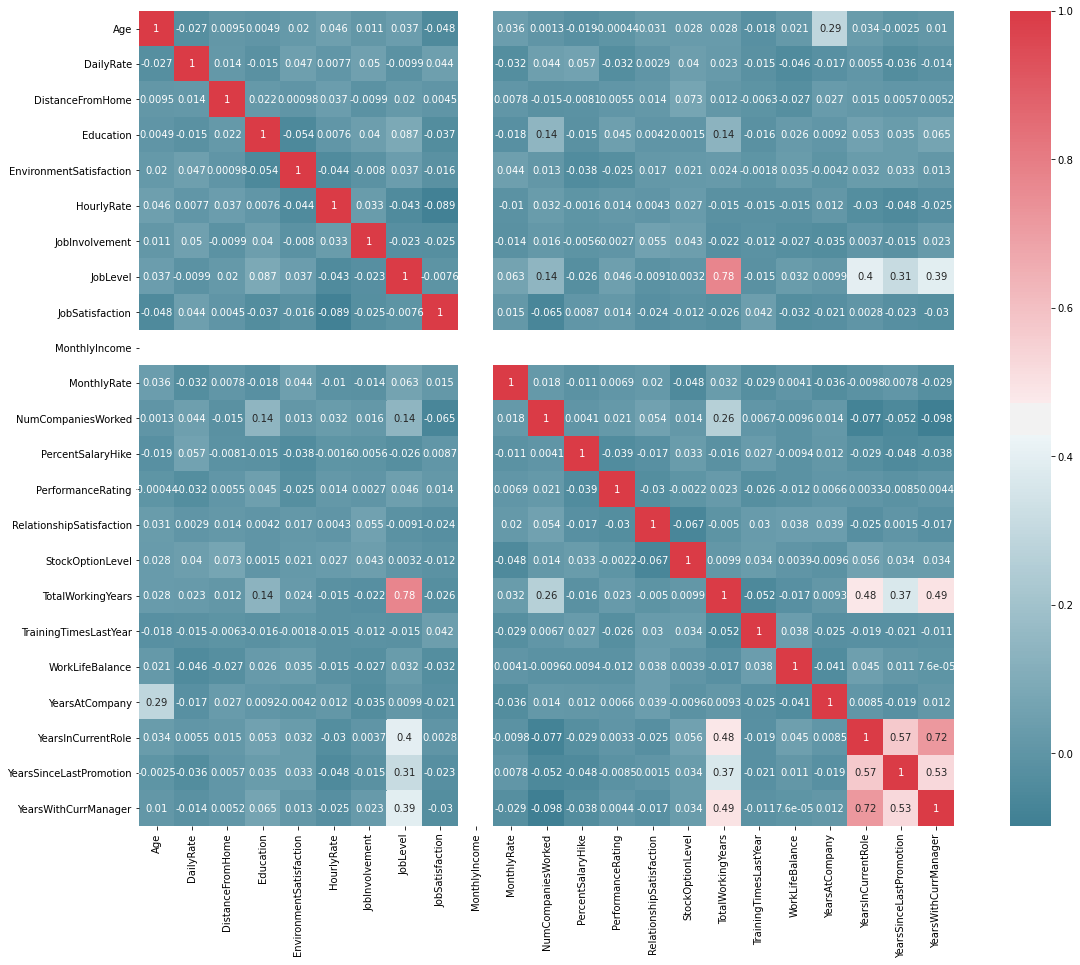

In [335]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

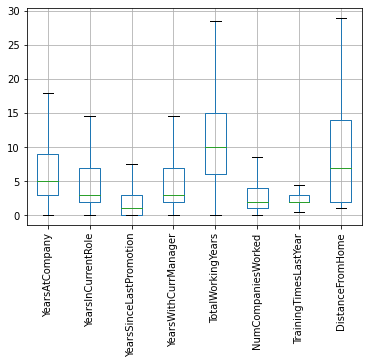

In [336]:
df.boxplot(column=['YearsAtCompany','YearsInCurrentRole',
                   'YearsSinceLastPromotion','YearsWithCurrManager',
                   'TotalWorkingYears','NumCompaniesWorked','TrainingTimesLastYear',
                  'DistanceFromHome'],rot=90)

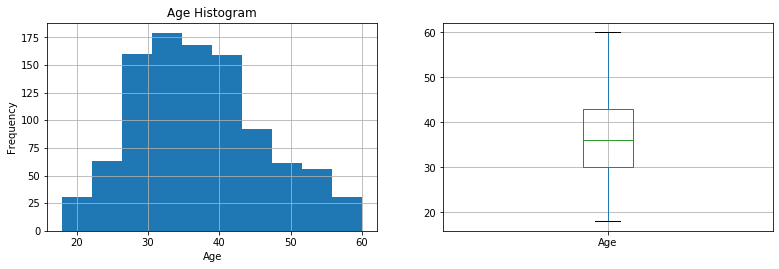

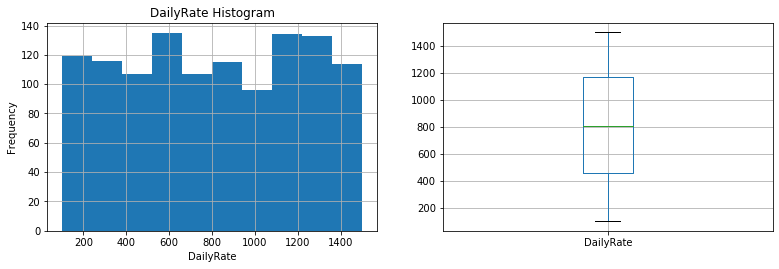

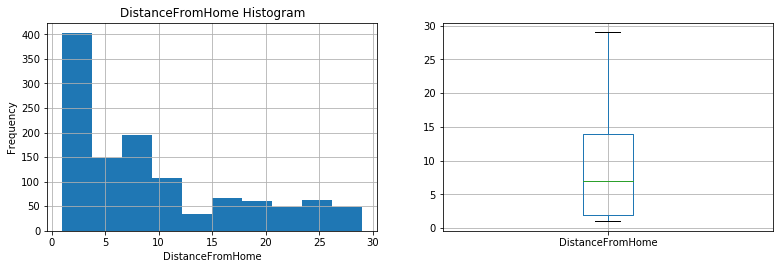

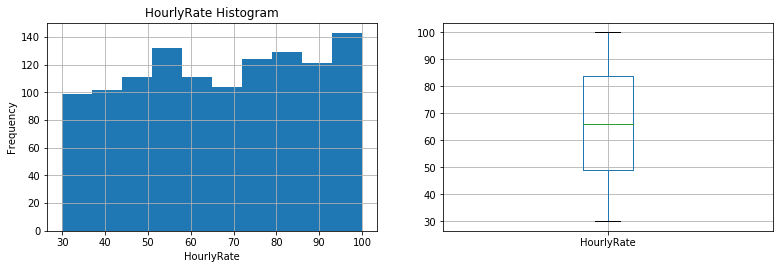

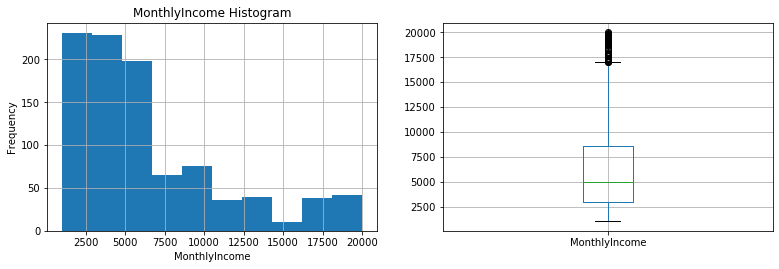

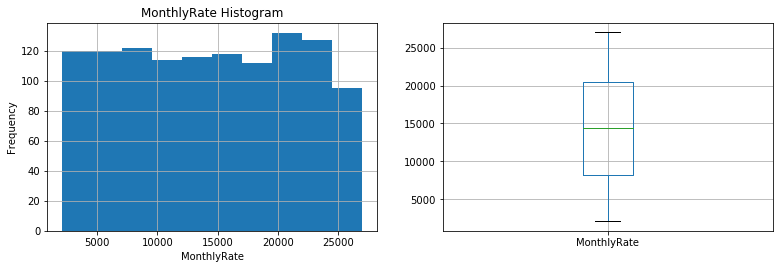

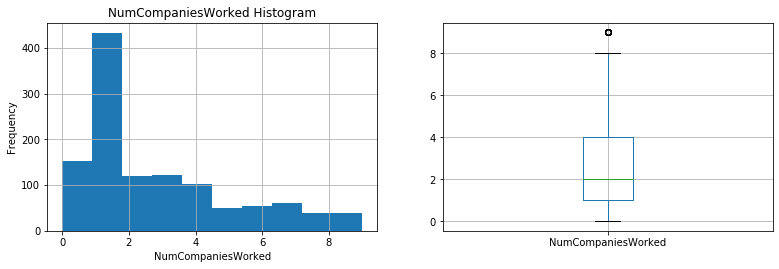

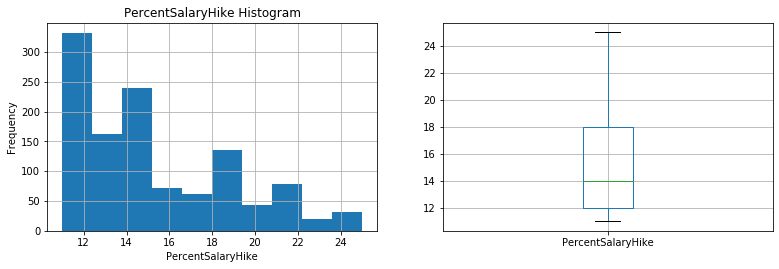

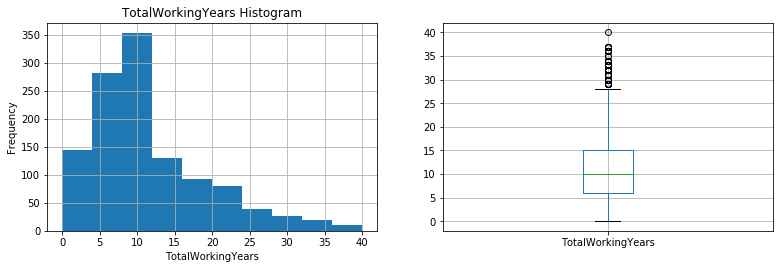

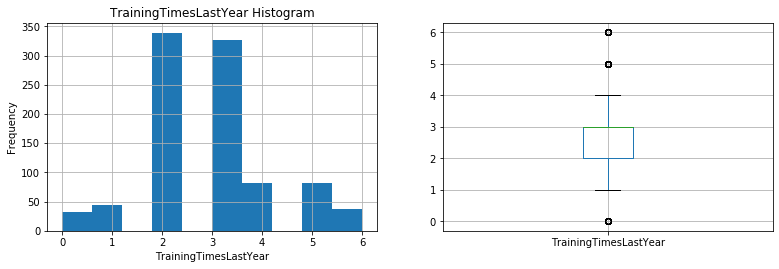

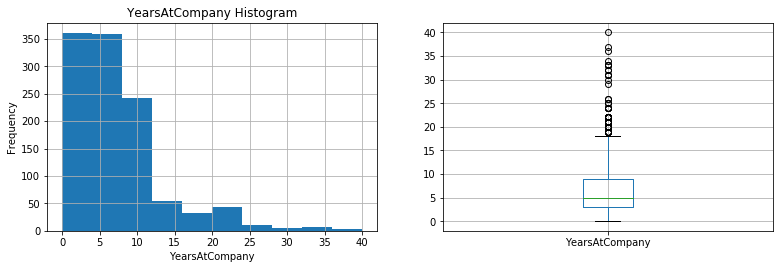

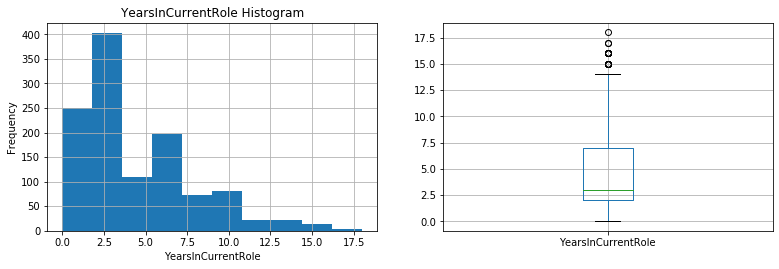

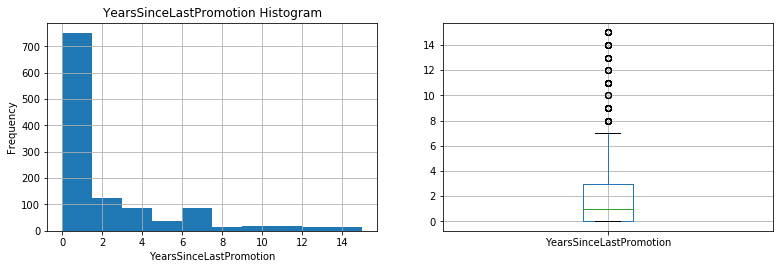

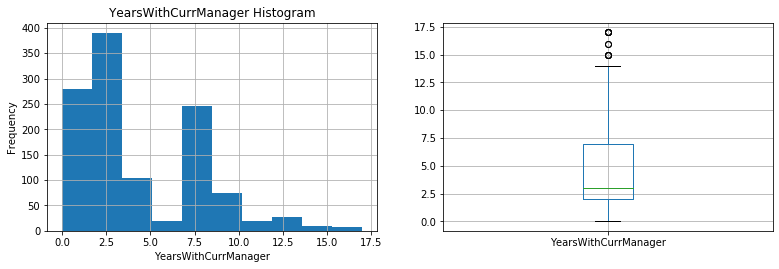

In [15]:
#NUMERIC ATTRIBUTE HISTOGRAMS (DISCRETE OVER 6 CLASSES) 
#fast view - default bin width default

for attr in num_attr:            
    fig = plt.figure(figsize=(13, 13)) 
    fig_dims = (3, 2)
    
    #Histogram
    plt.subplot2grid(fig_dims, (0, 0))
    df[attr].hist()
    plt.title(attr+ " Histogram")
    plt.xlabel(attr)
    plt.ylabel('Frequency')

    #Boxplot
    plt.subplot2grid(fig_dims, (0, 1))
    df.boxplot(column=[attr])